In [1]:
import os
import numpy as np
import networkx as nx
from copy import deepcopy
from vbi import report_cfg
import matplotlib.pyplot as plt
from vbi.models.cpp.mpr import MPR_sde

In [2]:
seed = 2
np.random.seed(seed)

LABESSIZE = 14
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [3]:
nn = 6
weights = nx.to_numpy_array(nx.complete_graph(nn))

parameters = {
    "G": 0.5,                          # global coupling strength
    "dt": 0.01,                         # for mpr model [ms]
    "dt_bold": 0.001,                   # for Balloon model [s]
    "J": 14.5,                          # model parameter
    "eta": -4.6,                        # model parameter
    "tau": 1.0,                         # model parameter
    "delta": 0.7,                       # model parameter
    "tr": 100.0,                    # sampling from mpr time series
    "noise_amp": 0.037,                 # amplitude of noise
    "iapp": 0.0,                        # constant applyed current
    "t_cut": 0.0,          # transition time * 10 [ms]
    "t_end": 30_000.0,             # end time * 10 [ms]
    "weights": weights,                 # weighted connection matrix
    "seed": seed,                       # seed for random number generator
    "noise_seed": True,                 # fix seed for noise
    "rv_decimate": 10,                  # sampling every n step from mpr time series
    "output": "output",                 # output directory
    "RECORD_R": 1,  
    "RECORD_BOLD": 1
}

# access to change BOLD parameters
bold_params = {"kappa":0.7}


Elapsed time: 0.6778223514556885
r_t.shape=(30000,)
r_d.shape=(12, 30000)
bold_t.shape=(300,)
bold_d.shape=(6, 300)


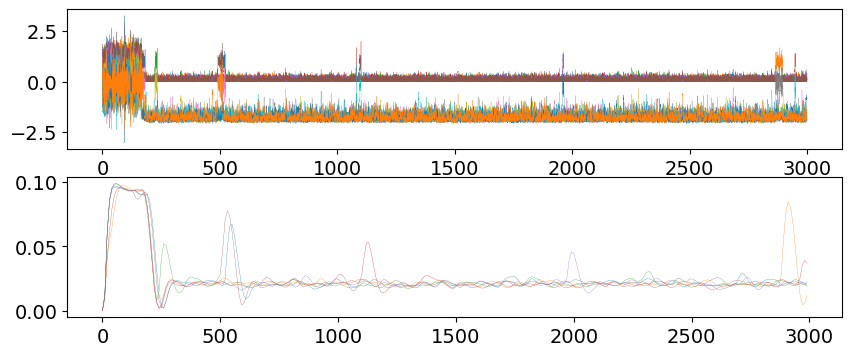

In [4]:
control_dict = {"G": 0.26}
from time import time
start = time()
obj = MPR_sde(parameters, bold_params)
sol = obj.run(par=control_dict)
print(f"Elapsed time: {time() - start}")

r_t = sol["r_t"]
r_d = sol["r_d"]
bold_t = sol["bold_t"]
bold_d = sol["bold_d"]

print(f"{r_t.shape=}")
print(f"{r_d.shape=}")
print(f"{bold_t.shape=}")
print(f"{bold_d.shape=}")

fig, ax = plt.subplots(2, 1, figsize=(10, 4))
ax[0].plot(r_t, r_d.T, lw=0.2);
ax[1].plot(bold_t, bold_d.T, lw=0.2);
plt.show()
